# Importovanje potrebnih biblioteka

In [53]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

# Generisanje portfolia (akcije+obveznice+kriptovalute)

In [54]:
start_date = '2018-01-01'
end_date = '2018-01-31'
portfolio_tickers = []


## Stocks (akcije)

In [55]:
#AUTOMATSKO PRIKUPLJANJE PODATAKA O AKCIJAMA


#MANUELNO PRIKUPLJANJE PODATAKA O AKCIJAMA
stock_tickers = ['AAPL', 'MSFT','GOOG','HPQ','INTC','NVDA','TXN','SAP','ADBE','ADSK']

#BRZE PRONALAZI DUPLIKATE AKO JE LISTA SORTIRANA
stock_tickers.sort()

#PROVERA DA LI IMA DUPLIKATA U LISTI TICKERA
if len(stock_tickers) > len(set(stock_tickers)):
    print("Postoje duplikati stock tickers-a")
    stock_tickers = list(set(stock_tickers))
else:
    print("Nema duplikata stock tickers-a")

#PROVERA DA LI IMA DUPLICATA U LISTI TICKERA PREKO NUMPY (VAZNO JE DA DRUGA PROVERA KAZE DA NEMA DUPLIKATA)

if len(stock_tickers)>np.unique(stock_tickers).size:
    print("Postoje duplikati stock tickers-a")
else:
    print("Nema duplikata stock tickers-a")
    

#PROVERA DA LI SE ZA DATI TIKER MOGU PRIKUPITI PODACI (AKO NE MOGU DA SE PRIKUPE PODACI IZBACI TI GA IZ LISTE TICKERA)
for stock_ticker in stock_tickers:
    try:
        stock = data.DataReader(stock_ticker, 'yahoo', start_date, end_date)
        portfolio_tickers.append(stock_ticker)
    except:
        print ("Nije moguce prikupiti podatke o tikeru:"+stock_ticker)
        stock_tickers.remove(stock_ticker)

        
               
#PRIKUPLJANJE PODATAKA PREKO BERZANSKOG API-JA  (BRZE KUPI SVE ODJEDNOM PODATKE NEGO DA IDE POJEDINACNO KROZ FOR PETLJU)      
stocks = data.DataReader(stock_tickers, 'yahoo', start_date, end_date)







Nema duplikata stock tickers-a
Nema duplikata stock tickers-a


## Bonds (obveznice)

In [56]:
#AUTOMATSKO PRIKUPLJANJE PODATAKA O OBVEZNICAMA


#MANUELNO PRIKUPLJANJE PODATAKA O OBVEZNICAMA
bond_tickers = ['AGZ', 'BIL','DLBL','DLBS','DTUL','DTUS','DTYL','FLAT','EDV','DTYS']

#BRZE PRONALAZI DUPLIKATE AKO JE LISTA SORTIRANA
bond_tickers.sort()

#PROVERA DA LI IMA DUPLIKATA U LISTI TICKERA
if len(bond_tickers) > len(set(bond_tickers)):
    print("Postoje duplikati bond tickers-a")
    bond_tickers = list(set(bond_tickers))
else:
    print("Nema duplikata bond tickers-a")

#PROVERA DA LI IMA DUPLICATA U LISTI TICKERA PREKO NUMPY (VAZNO JE DA DRUGA PROVERA KAZE DA NEMA DUPLIKATA)

if len(bond_tickers)>np.unique(bond_tickers).size:
    print("Postoje duplikati bond tickers-a")
else:
    print("Nema duplikata bond tickers-a")
    

#PROVERA DA LI SE ZA DATI TIKER MOGU PRIKUPITI PODACI (AKO NE MOGU DA SE PRIKUPE PODACI IZBACI TI GA IZ LISTE TICKERA)
for bond_ticker in bond_tickers:
    try:
        bond = data.DataReader(bond_ticker, 'yahoo', start_date, end_date)
        portfolio_tickers.append(bond_ticker)
    except:
        print ("Nije moguce prikupiti podatke o tikeru:"+bond_ticker)
        bond_tickers.remove(bond_ticker)

        
               
#PRIKUPLJANJE PODATAKA PREKO BERZANSKOG API-JA  (BRZE KUPI SVE ODJEDNOM PODATKE NEGO DA IDE POJEDINACNO KROZ FOR PETLJU)      
bonds = data.DataReader(bond_tickers, 'yahoo', start_date, end_date)


Nema duplikata bond tickers-a
Nema duplikata bond tickers-a


## Cryptocurrencies (kriptovalute)

In [57]:
#AUTOMATSKO PRIKUPLJANJE PODATAKA O KRIPTOVALUTAMA


#MANUELNO PRIKUPLJANJE PODATAKA O KRIPTOVALUTAMA
cryptocurrency_tickers = ['BTC-USD', 'ETH','XMR-USD','DASH-USD','EOS','NEO','LTC','ZEC-USD','XRP-USD','BCH']

#BRZE PRONALAZI DUPLIKATE AKO JE LISTA SORTIRANA
cryptocurrency_tickers.sort()

#PROVERA DA LI IMA DUPLIKATA U LISTI TICKERA
if len(cryptocurrency_tickers) > len(set(cryptocurrency_tickers)):
    print("Postoje duplikati cryptocurrency tickers-a")
    cryptocurrency_tickers = list(set(cryptocurrency_tickers))
else:
    print("Nema duplikata cryptocurrency tickers-a")

#PROVERA DA LI IMA DUPLICATA U LISTI TICKERA PREKO NUMPY (VAZNO JE DA DRUGA PROVERA KAZE DA NEMA DUPLIKATA)

if len(cryptocurrency_tickers)>np.unique(cryptocurrency_tickers).size:
    print("Postoje duplikati cryptocurrency tickers-a")
else:
    print("Nema duplikata cryptocurrency tickers-a")
    

#PROVERA DA LI SE ZA DATI TIKER MOGU PRIKUPITI PODACI (AKO NE MOGU DA SE PRIKUPE PODACI IZBACI TI GA IZ LISTE TICKERA)
for cryptocurrency_ticker in cryptocurrency_tickers:
    try:
        cryptocurrency = data.DataReader(cryptocurrency_ticker, 'yahoo', start_date, end_date)
        portfolio_tickers.append(cryptocurrency_ticker)
    except:
        print ("Nije moguce prikupiti podatke o tikeru:"+cryptocurrency_ticker)
        cryptocurrency_tickers.remove(cryptocurrency_ticker)

        
               
#PRIKUPLJANJE PODATAKA PREKO BERZANSKOG API-JA  (BRZE KUPI SVE ODJEDNOM PODATKE NEGO DA IDE POJEDINACNO KROZ FOR PETLJU)      
cryptocurrencies = data.DataReader(cryptocurrency_tickers, 'yahoo', start_date, end_date)


Nema duplikata cryptocurrency tickers-a
Nema duplikata cryptocurrency tickers-a


# Pretprocesiranje prikupljenih podataka

In [58]:
#GORNJE CELIJE MOGU DA SE POKRENU VISE PUTA NEZAVISNO OD OSTATKA PROGRAMA (NIJE LINIJSKO IZVRSAVANJE PROGRAMA)
#STO DOVODI DA SE DODAJU ISTI TICKERI VISE PUTA
#BRZE PRONALAZI DUPLIKATE AKO JE LISTA SORTIRANA
portfolio_tickers.sort()

#PROVERA DA LI IMA DUPLIKATA U LISTI TICKERA
if len(portfolio_tickers) > len(set(portfolio_tickers)):
    print("Postoje duplikati portfolio tickers-a")
    portfolio_tickers = list(set(portfolio_tickers))
else:
    print("Nema duplikata portfolio tickers-a")

#PROVERA DA LI IMA DUPLICATA U LISTI TICKERA PREKO NUMPY (VAZNO JE DA DRUGA PROVERA KAZE DA NEMA DUPLIKATA)

if len(portfolio_tickers)>np.unique(portfolio_tickers).size:
    print("Postoje duplikati portfolio tickers-a")
else:
    print("Nema duplikata portfolio tickers-a")

portfolio = pd.concat([stocks,bonds,cryptocurrencies], sort =False)
portfolio

Nema duplikata portfolio tickers-a
Nema duplikata portfolio tickers-a


Attributes   Adj Close                                                 \
Symbols           AAPL        ADBE        ADSK         AGZ        BCH   
Date                                                                    
2018-01-02  168.339050  177.699997  107.120003         NaN        NaN   
2018-01-03  168.309738  181.039993  109.379997         NaN        NaN   
2018-01-04  169.091522  183.220001  112.070000         NaN        NaN   
2018-01-05  171.016678  185.339996  110.839996         NaN        NaN   
2018-01-08  170.381485  185.039993  111.419998         NaN        NaN   
2018-01-09  170.361954  186.699997  112.110001         NaN        NaN   
2018-01-10  170.322845  187.110001  111.470001         NaN        NaN   
2018-01-11  171.290329  188.919998  113.260002         NaN        NaN   
2018-01-12  173.059113  195.050003  115.910004         NaN        NaN   
2018-01-16  172.179611  192.460007  111.980003         NaN        NaN   
2018-01-17  175.023361  196.490005  113.000000         NaN        NaN   
2018-01-18  175.179718  196.199997  112.550003         NaN        NaN   
2018-01-19  174.397949  195.729996  115.290001         NaN        NaN   
2018-01-22  172.971176  197.839996  117.430000         NaN        NaN   
2018-01-23  173.010254  200.089996  118.730003         NaN        NaN   
2018-01-24  170.254440  197.779999  116.900002         NaN        NaN   
2018-01-25  167.215210  197.509995  116.870003         NaN        NaN   
2018-01-26  167.606140  201.300003  117.779999         NaN        NaN   
2018-01-29  164.136932  198.229996  116.379997         NaN        NaN   
2018-01-30  163.169464  196.899994  115.019997         NaN        NaN   
2018-01-31  163.618988  199.759995  115.620003         NaN        NaN   
2018-01-02         NaN         NaN         NaN  109.079651        NaN   
2018-01-03         NaN         NaN         NaN  109.127960        NaN   
2018-01-04         NaN         NaN         NaN  109.108658        NaN   
2018-01-05         NaN         NaN         NaN  108.925049        NaN   
2018-01-08         NaN         NaN         NaN  108.857391        NaN   
2018-01-09         NaN         NaN         NaN  108.693130        NaN   
2018-01-10         NaN         NaN         NaN  108.606171        NaN   
2018-01-11         NaN         NaN         NaN  108.644806        NaN   
2018-01-12         NaN         NaN         NaN  108.712463        NaN   
...                ...         ...         ...         ...        ...   
2018-01-03         NaN         NaN         NaN         NaN  30.850269   
2018-01-04         NaN         NaN         NaN         NaN  30.918890   
2018-01-05         NaN         NaN         NaN         NaN  31.480310   
2018-01-06         NaN         NaN         NaN         NaN        NaN   
2018-01-07         NaN         NaN         NaN         NaN        NaN   
2018-01-08         NaN         NaN         NaN         NaN  31.380503   
2018-01-09         NaN         NaN         NaN         NaN  31.318123   
2018-01-10         NaN         NaN         NaN         NaN  31.018698   
2018-01-11         NaN         NaN         NaN         NaN  32.147781   
2018-01-12         NaN         NaN         NaN         NaN  32.035500   
2018-01-13         NaN         NaN         NaN         NaN        NaN   
2018-01-14         NaN         NaN         NaN         NaN        NaN   
2018-01-15         NaN         NaN         NaN         NaN        NaN   
2018-01-16         NaN         NaN         NaN         NaN  31.857714   
2018-01-17         NaN         NaN         NaN         NaN  32.313087   
2018-01-18         NaN         NaN         NaN         NaN  31.801571   
2018-01-19         NaN         NaN         NaN         NaN  32.200806   
2018-01-20         NaN         NaN         NaN         NaN        NaN   
2018-01-21         NaN         NaN         NaN         NaN        NaN   
2018-01-22         NaN         NaN         NaN         NaN  32.550137   
2018-01-23         NaN         NaN         NaN         NaN

## 3D Finansijski podaci (time series, features, financial asset) i MultiIndex

In [59]:
#KAKO IZGLEDAJU FINANSIJSKI PODACI POVUCENI SA BERZE
print(portfolio)

#RESETOVANJE INDEXA (KADA SE PODACI POVUKU SA BERZE ONI IMAJU DEFAULTNI INDEX 
#U VIDI DatetimeIndex DA BI SE OLAKSALA ANALIZA n-DIMENZIONIH PODATAKA RESETUJE 
#SE POSTOJECI DEFAULTNI INDEX I FORMIRA SE NOVI MULTIINDEX KOJI OBUHVATA KOLONE
#Date I Symbols UKOLIKO SE OVA TRANSFORMACIJA NE BI IZVRSILA ONDA BI SE DODATNA 
#KOLONA KLASTER VEZIVALA ZA DANE, A NE ZA SIMBOLE FINANSIJEKE AKTIVE TJ. TIKERE
#STOGA SE MORA IZVRSITI TRANSFORMACIJA)

#RESETOVANJE POSTOJECEG DEFAULTNOG INDEXA (DatetimeIndex)
resetovani_portfolio = portfolio.stack().reset_index()

#SETOVANJE MULTIINDEXA (Date I Symbols)
resetovani_portfolio.set_index(['Date', 'Symbols'], inplace=True)
resetovani_portfolio.sort_index(inplace=True)

#ZA SPROVODJENJE KLASTEROVANJA POTREBAN JE PORTFOLIO NA TACNO ODREDJEN DAN U OKVIRU VREMENSKE SERIJE
dnevni_portfolio = resetovani_portfolio.loc[('2018-01-30')].copy()
dnevni_portfolio

Attributes   Adj Close                                                 \
Symbols           AAPL        ADBE        ADSK         AGZ        BCH   
Date                                                                    
2018-01-02  168.339050  177.699997  107.120003         NaN        NaN   
2018-01-03  168.309738  181.039993  109.379997         NaN        NaN   
2018-01-04  169.091522  183.220001  112.070000         NaN        NaN   
2018-01-05  171.016678  185.339996  110.839996         NaN        NaN   
2018-01-08  170.381485  185.039993  111.419998         NaN        NaN   
2018-01-09  170.361954  186.699997  112.110001         NaN        NaN   
2018-01-10  170.322845  187.110001  111.470001         NaN        NaN   
2018-01-11  171.290329  188.919998  113.260002         NaN        NaN   
2018-01-12  173.059113  195.050003  115.910004         NaN        NaN   
2018-01-16  172.179611  192.460007  111.980003         NaN        NaN   
2018-01-17  175.023361  196.490005  113.000000     

Attributes              Adj Close         Close          High          Low  \
Date       Symbols                                                           
2018-01-30 AAPL        163.169464    166.970001    167.369995   164.699997   
           ADBE        196.899994    196.899994    197.729996   194.889999   
           ADSK        115.019997    115.019997    116.349998   113.769997   
           AGZ         108.209969    111.980003    112.059998   111.949997   
           BCH          32.288139     34.506668     34.570000    34.023335   
           BIL          88.989380     91.510002     91.519997    91.489998   
           BTC-USD   10107.259766  10107.259766  11263.700195  9871.209961   
           DASH-USD    682.200012    682.200012    783.190002   676.229980   
           DLBL         78.320000     78.320000     78.320000    78.320000   
           DLBS         19.309999     19.309999     19.340000    19.000000   
           DTUL         58.330002     58.330002     58.330002    58.330002   
           DTUS         37.029999     37.029999     37.029999    37.020000   
           DTYL         73.720001     73.720001     73.720001    73.720001   
           DTYS         21.410000     21.410000     21.500000    21.190001   
           EDV         109.792717    114.620003    115.010002   114.290001   
           EOS          14.685059     16.139999     16.280001    16.040001   
           ETH          22.580585     24.900000     25.049999    24.450001   
           FLAT         64.529999     64.529999     64.529999    64.529999   
           GOOG       1163.689941   1163.689941   1176.520020  1163.520020   
           HPQ          22.499489     23.440001     23.760000    23.290001   
           INTC         47.004742     48.790001     50.060001    48.740002   
           LTC          37.169857     40.090000     40.619999    39.900002   
           MSFT         90.439423     92.739998     93.660004    92.099998   
           NEO           7.750000      7.750000      7.930000     7.600000   
           NVDA        241.519730    242.720001    246.419998   238.410004   
           SAP         107.672310    110.809998    113.150002   110.190002   
           TXN         106.184410    109.889999    111.470001   109.300003   
           XMR-USD     275.209991    275.209991    315.910004   267.839996   
           XRP-USD       1.110000      1.110000      1.270000     1.090000   
           ZEC-USD     384.540009    384.540009    450.630005   381.529999   

Attributes                   Open        Volume  
Date       Symbols                               
2018-01-30 AAPL        165.529999  4.604820e+07  
           ADBE        197.250000  3.343300e+06  
           ADSK        115.459999  1.556400e+06  
           AGZ         112.000000  1.110000e+04  
           BCH          34.320000  8.910000e+04  
           BIL          91.489998  5.813000e+05  
           BTC-USD   11234.320312  1.720894e+09  
           DASH-USD    770.599976  1.814951e+07  
           DLBL         78.320000  0.000000e+00  
           DLBS         19.000000  5.800000e+03  
           DTUL         58.330002  0.000000e+00  
           DTUS         37.020000  7.000000e+02  
           DTYL         73.720001  1.000000e+02  
           DTYS         21.320000  3.640000e+04  
           EDV         114.980003  4.920000e+04  
           EOS          16.240000  1.684000e+05  
           ETH          24.850000  5.029000e+05  
           FLAT         64.529999  0.000000e+00  
           GOOG       1167.829956  1.556300e+06  
           HPQ          23.639999  7.973400e+06  
           INTC         49.480000  3.281460e+07  
           LTC          40.380001  2.513000e+05  
           MSFT         93.300003  3.863510e+07  
           NEO           7.770000  3.461000e+05  
           NVDA        241.110001  1.427080e+07  
           SAP         112.980003  6.145800e+06  
           TXN         111.199997  6.492900e+06  
           XMR-USD     314.950012  2.226367e+07  
   

## Standardizacija vs Normalizacija podataka

In [60]:
scaler = StandardScaler()
dnevni_portfolio_scaled = scaler.fit_transform(dnevni_portfolio)


# Odredjivanje parametara klaster modela 

## K-means model

### Elbow method

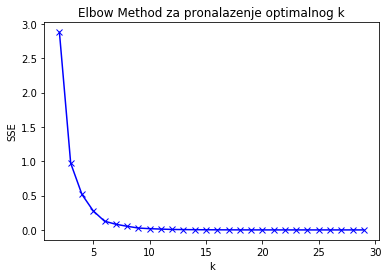

In [67]:
#INERCIJA = DISPERZIJA = RASUTOS = UDALJENOST UZORKA OD NAJBLIZEG CENTROIDA
#NEMA PUNO SMISLA DA IMAS SAMO JEDAN KLASTER ZATO SE KRECE OD 2(inclusive), SA DRUGE STRANE NEMA PUNO SMISLA NI DA 
#SVAKI UZORAK IMA SVOJ KLASTER ZATO SE IDE DO N=BROJ KLASTERA(exclusive)

SSE = []
K = range(2,len(portfolio_tickers))
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dnevni_portfolio_scaled)
    SSE.append(km.inertia_)
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method za pronalazenje optimalnog k')
plt.show()

### Silhouette coefficients

In [73]:
#INERCIJA = DISPERZIJA = RASUTOS = UDALJENOST UZORKA OD NAJBLIZEG CENTROIDA
#NEMA PUNO SMISLA DA IMAS SAMO JEDAN KLASTER ZATO SE KRECE OD 2(inclusive), SA DRUGE STRANE NEMA PUNO SMISLA NI DA 
#SVAKI UZORAK IMA SVOJ KLASTER ZATO SE IDE DO N=BROJ KLASTERA(exclusive)

K = range(2,len(portfolio_tickers))
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit_predict(dnevni_portfolio_scaled)
    silhouette_coefficient = silhouette_score(dnevni_portfolio_scaled, km)
    print("Za ",k," klastera koeficijent siluete iznosi :", silhouette_coefficient)



    

Za  2  klastera koeficijent siluete iznosi : 0.9458550404450091
Za  3  klastera koeficijent siluete iznosi : 0.7698202626580893
Za  4  klastera koeficijent siluete iznosi : 0.7269840965425566
Za  5  klastera koeficijent siluete iznosi : 0.5733091253324647
Za  6  klastera koeficijent siluete iznosi : 0.5542945746228243
Za  7  klastera koeficijent siluete iznosi : 0.3972762017448218
Za  8  klastera koeficijent siluete iznosi : 0.4547012879060862
Za  9  klastera koeficijent siluete iznosi : 0.46121485041391824
Za  10  klastera koeficijent siluete iznosi : 0.4644172661336158
Za  11  klastera koeficijent siluete iznosi : 0.44422455001049904
Za  12  klastera koeficijent siluete iznosi : 0.4492318533910443
Za  13  klastera koeficijent siluete iznosi : 0.43281023844387057
Za  14  klastera koeficijent siluete iznosi : 0.4037673911560246
Za  15  klastera koeficijent siluete iznosi : 0.3400823829443561
Za  16  klastera koeficijent siluete iznosi : 0.3604169949589016
Za  17  klastera koeficijent s

### Gap statistic

## DBSCAN model

# Sprovodjenje klasterovanja finansijske aktive

In [63]:
portfolio
#RESETOVANJE INDEXA
res = portfolio.stack().reset_index()

#res.set_index(['Symbols'], inplace=True)
res.set_index(['Date', 'Symbols'], inplace=True)
res.sort_index(inplace=True)
print("secenje")
print(res.loc[('2018-01-30')])
isecak = res.loc[('2018-01-30')].copy()

scaler = StandardScaler()
isecak_scaled = scaler.fit_transform(isecak)
print("pretprocesiranje")
print(isecak_scaled)



#print(isecak)
cluster_model = KMeans(n_clusters=3)
prediction = cluster_model.fit_predict(isecak_scaled)
isecak["Cluster"] = prediction

# cluster the data into five clusters
#za min_samples = 1 svaki uzorak ima svoj klaster 
dbscan = DBSCAN(eps=3, min_samples = 6)
clusters = dbscan.fit_predict(isecak_scaled)
isecak["Klaster"] = clusters+1
print(isecak)

secenje
Attributes              Adj Close         Close          High          Low  \
Date       Symbols                                                           
2018-01-30 AAPL        163.169464    166.970001    167.369995   164.699997   
           ADBE        196.899994    196.899994    197.729996   194.889999   
           ADSK        115.019997    115.019997    116.349998   113.769997   
           AGZ         108.209969    111.980003    112.059998   111.949997   
           BCH          32.288139     34.506668     34.570000    34.023335   
           BIL          88.989380     91.510002     91.519997    91.489998   
           BTC-USD   10107.259766  10107.259766  11263.700195  9871.209961   
           DASH-USD    682.200012    682.200012    783.190002   676.229980   
           DLBL         78.320000     78.320000     78.320000    78.320000   
           DLBS         19.309999     19.309999     19.340000    19.000000   
           DTUL         58.330002     58.330002     58.3

# Komparacija klaster modela

# Vizuelizacija klastera dobijenih K-means modelom 
# (Parallel Coordinates tehnika)

# Vizuelizacija klastera dobijenih DBSCAN modelom 
# (Parallel Coordinates tehnika)